In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("Housing.csv")

print(data.head())
print(data.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [4]:
# Encode categorical variables if any
data_encoded = pd.get_dummies(data, drop_first=True)

# Check for missing values
print(data_encoded.isnull().sum())

# Summary statistics
print(data_encoded.describe())

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.0000

R2 Score: 0.27287851871974644
MSE: 3675286604768.185


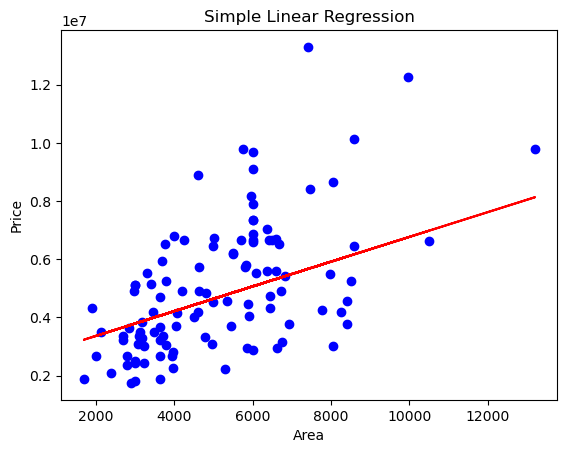

In [6]:
from sklearn.linear_model import LinearRegression

X = data_encoded[['area']]  # independent variable
y = data_encoded['price']   # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.show()


In [8]:
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.6529242642153184
MSE: 1754318687330.6643
